# title

## h1 vs h2 vs h3

### original h1


In [82]:
import matplotlib.pyplot as plt
# import csv
import os

In [83]:
dir_path = os.path.abspath('')
count = 0

with open(dir_path+"/vrf-runtime-breakdown/stat.csv") as breakdown_file: 
    lines = breakdown_file.readlines()

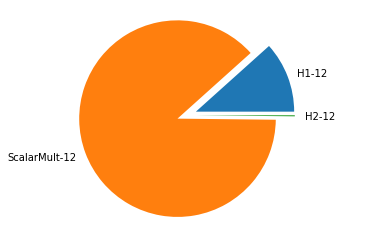

In [84]:
labels = []
sizes = []
explode = []
for i in range(len(lines)):
    if lines[i].startswith("name,time/op"):
        for j in range(1, 4):
            data = lines[i+j].split(",")
            labels.append(data[0])
            sizes.append(data[1])
            explode.append(0.1)

plt.pie(sizes, labels=labels, explode=explode)
plt.axis('equal')
plt.show()

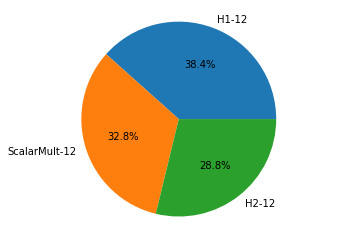

In [85]:
labels = []
sizes = []
for i in range(len(lines)):
    if lines[i].startswith("name,alloc/op"):
        for j in range(1, 4):
            data = lines[i+j].split(",")
            labels.append(data[0])
            sizes.append(data[1])
            explode.append(0.1)

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

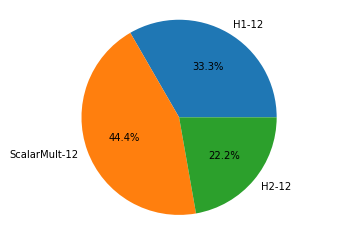

In [86]:
labels = []
sizes = []
for i in range(len(lines)):
    if lines[i].startswith("name,allocs/op"):
        for j in range(1, 4):
            data = lines[i+j].split(",")
            labels.append(data[0])
            sizes.append(data[1])
            explode.append(0.1)

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.show()